<a href="https://colab.research.google.com/github/Mcuong17/DoanWEB-demo/blob/main/Airline_Time_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Giới thiệu topic**
Đối mặt với sự chậm trễ của các chuyến bay luôn là một điều rất phiền toái với khách hang bởi vì điều đó là điều họ không thể dự đoán hay lường trước rằng việc delay chuyến bay sẽ xảy ra. Việc chậm trễ khi bay có thể dẫn đến lãng phí thời gian và có thể làm xáo trộn lịch bay của chuyến bay tiếp theo. Do đó bài phân tích này nhằm mục đích kiểm tra các dữ liệu của các chuyến bay và tìm hiểu các dạng chậm trễ của chuyến bay, giúp khách hang có thể dự đoán được sự chậm trễ đó xảy ra như thế nào.

# **Data Pre Processing( Tiền xử lý dữ liệu)**
Đầu tiên chúng ta sẽ thêm các thư viện cần dùng
Những thư viện được sử dụng đó là:
1.   Numpy: được sử dụng cho các hàm tính toán, xử lý các mảng dữ liệu numberic
2.   Pandas: Được sử dụng để xử lý các vấn đề liên quan đến dữ liệu, dataset...
3.    Matplotlib và Seaborn: Được sử dụng cho việc trực quan hóa dữ liệu
4.    Sklearn: Tạo mô hình và chứa một số chức năng tiền xử lý dữ liệu hữu ích



In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Load dataframe

In [3]:

df1 = pd.read_csv("/content/gdrive/MyDrive/Dataset/1999.csv")
df1.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1999,1,27,3,1906.0,1908,2024.0,2005,US,1244,...,3,9,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1999,1,28,4,2016.0,1908,2126.0,2005,US,1244,...,19,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1999,1,29,5,1907.0,1908,2000.0,2005,US,1244,...,2,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1999,1,31,7,1932.0,1908,2031.0,2005,US,1244,...,6,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1999,1,1,5,1601.0,1535,1707.0,1645,US,297,...,11,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df2 = pd.read_csv("/content/gdrive/MyDrive/Dataset/2000.csv")

In [5]:
df = pd.concat([df1, df2])

## Tổng quan về dataframe, tên các cột và kích thước của df

In [ ]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

Dựa vào dữ liệu đã cung cấp: Dataset bao gồm hơn 11 triệu observation về chuyến bay với 29 cột:
*   **Year [int]:** Bao gồm thông tin về năm(1999&2000)
*   **Month [int]:** Thông tin về tháng(1 - Jan, 2 - Feb..)
*   **DayofMonth [int]**: Ngày trong tháng(1-31, nếu có)
*   **DayOfWeek [int]**: Ngày trong tuần(1 - Mon, 2 - Tue..)
*   **DepTime [int]**: Thời gian khởi hành thực tế(theo múi giờ địa phương)
*   **CRSDepTime [int]**: Thời gian khởi hành theo lịch trình(theo múi giờ địa phương)
*   **ArrTime [int]**: Thời gian thực tế(theo múi giờ địa phương)
*   **UniqueCarrier [int]**: Mã nhà cung cấp dịch vụ để xác định các nhà cung cấp dịch vụ trong file carriers.csv
*   **FlightNum [int]**: Số chuyến bay
*   **TailNum [str]**: Số hiệu trên đuôi máy bay có trong file plane-data.csv
*   **ActualElapsedTime [int]**: Sự khác biệt giữa ArrTime và DepTime trong vài phút, đồng thời cũng là tổng của AirTime, TaxiIn, TaxiOut
*   **CRSElapsedTime [int]**:  Sự khác biệt giữa CRSArrTime và CRSDepTime trong vài phút
*   ** ArrDelay [int]:**Sự khác biệt giữa ArrTime và CRSArrTime trong vài phút
*    **DepDelay [int]**: Sự khác biệt giữa DepTime and CRSDepTime trong vài phút
*    **Origin [str]**: Sử dụng để xác định mã sân bay IATA mà chuyến bay đã khởi hành trong file airports.csv
*    **Dest [str]**: Sử dụng để xác định mã sân bay IATA mà chuyến bay đã khởi hành trong file airports.csv
*    **Distance [int]**: Khoảng cách bay( tính bằng dặm)
*    **TaxiIn [int]**: Thời gian taxi đến tính bằng phút
*    **TaxiOut [int]**: Thời gian taxi trả tính bằng phút
*    **Cancelled [int]**: Hủy chuyến bay(1 - bị hủy, 0 - Không bị hủy)
*    **CancellationCode [str]**: Lý do hủy chuyến bay ( A - Hãng vận chuyển, B - Thời tiết, C - Hệ thống hàng không quốc gia, D - An ninh)
*   ** Diverted [int]**: chuyển hướng( 1 - Chuyển hướng, 0 - không chuyển hướng)
*   **WeatherDelay [int]**: Sự chậm trễ ảnh hưởng do thời tiết tính bằng phút
*   **NASDelay [int]**: Sự chậm trễ ảnh hưởng do hệ thống hàng không quốc gia gây ra trong vài phút
*  ** LateAircraftDelay [int]**: Sự chậm trể ảnh hưởng bởi chuyến bay trước cũng bị muộn

-  Dựa trên các cột, có 3 taajo dữ liệu bổ sung cần thêm vào như sau:
*   **airports.csv**: Chứa thông tin về các chuyến bay khởi hành và chuyến bay đến
*   **carriers.csv:** Chứa thông tin về hãng bay
*   **plane-data.csv**: Chứa thông tin về máy bay


In [6]:
airport_df = pd.read_csv("/content/gdrive/MyDrive/Dataset/airports.csv")
carriers_df = pd.read_csv("/content/gdrive/MyDrive/Dataset/carriers.csv")
plane_df = pd.read_csv("/content/gdrive/MyDrive/Dataset/plane-data.csv")

  Tên cột và hình dạng bảng dữ liệu

In [ ]:
airport_df.columns, airport_df.shape

(Index(['iata', 'airport', 'city', 'state', 'country', 'lat', 'long'], dtype='object'),
 (3376, 7))

In [ ]:
carriers_df.columns, cariers_df.shape

(Index(['Code', 'Description'], dtype='object'), (1491, 2))

In [ ]:
plane_df.columns, plane_df.shape

(Index(['tailnum', 'type', 'manufacturer', 'issue_date', 'model', 'status',
        'aircraft_type', 'engine_type', 'year'],
       dtype='object'), (5029, 9))

In [ ]:
airport_df.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [ ]:
carriers_df.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [ ]:
plane_df.tail() # do head() không chứa thông tin hữu ích

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998
5028,N999DN,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992


Qua phân tích các dataset:
airports.csv chứa iata, airport, state, country, lat & long sẽ được sử dụng để gắn thẻ tên và cho biết vị trí của các sân bay
carriers.csv: chứa Code và Decription sử dụng để gắn thẻ tên của nhà cung cấp dịch vụ
plane-data chứa tailnum, type, manufacturer, issue_date, model, status, aircraft_type, engine_type & year sẽ được sử dụng để gắn thẻ các chi tiết sản xuất của máy bay

# **Data Exploration**

## Question 1: Thời gian tốt nhất trong ngày, tuần và thời gian trong năm sẽ giảm thiểu sự chậm trễ khi bay

Đầu tiên ta có: Tổng thời gian khi trễ được tính bằng cách trừ ActualElapsedTime(Thời gian thực tế) cho CRSElapsedTime(Thời gian đã trôi qua). Thời gian khởi hành của mỗi nhóm quan sát được nhóm theo giờ. Cuối cùng thống kê mô tả về tổng thời gian trễ được kiểm tra theo giờ, theo ngày trong tuần

### *Thống kê mô tả theo giờ trong ngày*

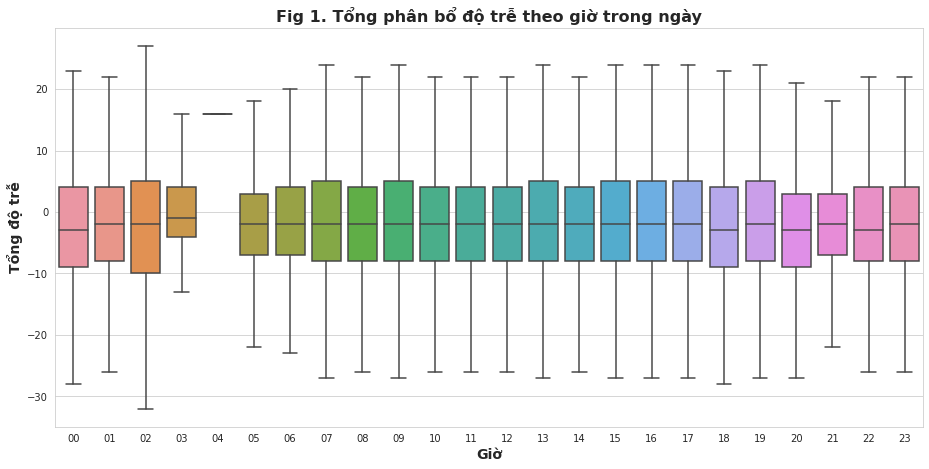

In [7]:
df["total_delay"] = df["ActualElapsedTime"] - df["CRSElapsedTime"]

def get_hour(time):
    return "00" if str(time)[:-2] == "24" else str(time)[:-2].zfill(2)

df["hr"] = df["CRSDepTime"].apply(get_hour)

sns.set_style("whitegrid")
fig1, ax1 = plt.subplots(figsize=(12.8, 6.4), constrained_layout=True)
ax1 = sns.boxplot(x="hr", y="total_delay", order=np.sort(df["hr"].unique()), data=df[["total_delay", "hr"]], showfliers=False)
ax1.set_title("Fig 1. Tổng phân bổ độ trễ theo giờ trong ngày", fontdict={"weight": "bold", "fontsize": 16})
ax1.set_xlabel("Giờ", fontdict={"weight": "bold", "fontsize": 14})
ax1.set_ylabel("Tổng độ trễ", fontdict={"weight": "bold", "fontsize": 14})
pass

Sự phân bố tổng số lần chậm trễ được so sánh theo giờ. Nhìn vào Hình 1, ta thấy hầu hết các chuyến bay có thời gian trễ trung bình là 2 phút nhưng có sự thay đổi lớn về độ trễ lên đến 20 phút. Các chuyến bay lúc 03:00 giờ có mức độ chậm trễ thay đổi thấp nhất( không bao gồm 04 giờ có thời gian trễ trung bình thấp nhất) và có thời gian trễ trung bình là 1 phút. 
Vì vậy, các chuyến bay lúc 03:00 giờ sẽ là một lựa chọn tốt và giảm thiểu khả năng bị hoãn lâu.

### *Thống kê mô tả theo ngày trong tuần*

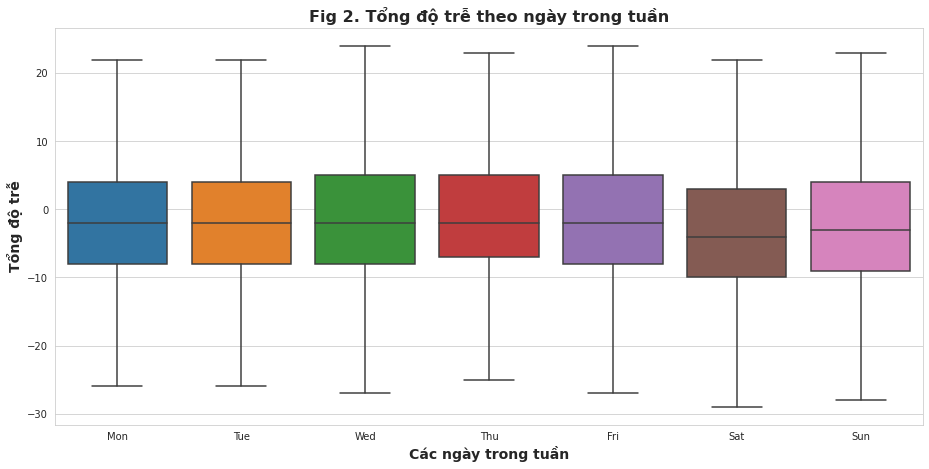

In [8]:
sns.set_style("whitegrid")
fig2, ax2 = plt.subplots(figsize=(12.8, 6.4), constrained_layout=True)
ax2 = sns.boxplot(x="DayOfWeek", y="total_delay", order=np.sort(df["DayOfWeek"].unique()), data=df[["total_delay", "DayOfWeek"]], showfliers=False)
ax2.set_title("Fig 2. Tổng độ trễ theo ngày trong tuần", fontdict={"weight": "bold", "fontsize": 16})
ax2.set_xlabel("Các ngày trong tuần", fontdict={"weight": "bold", "fontsize": 14})
ax2.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
ax2.set_ylabel("Tổng độ trễ", fontdict={"weight": "bold", "fontsize": 14})
pass

Sự phân bổ độ trễ được so sánh theo các ngày trong tuần dựa trên Hình 2.
Qua đó ta có thể thấy được hầu hết các chuyến bay có sự phân bổ thời gian trễ như nhau. Tuy nhiên các chuyến bay vào các ngày thứ 7 có độ trễ trung bình thấp hơn và sự phân bổ thời gian trễ của nó có thể sẽ thấp hơn những ngày khác.

### T*hống kê mô tả theo tháng*

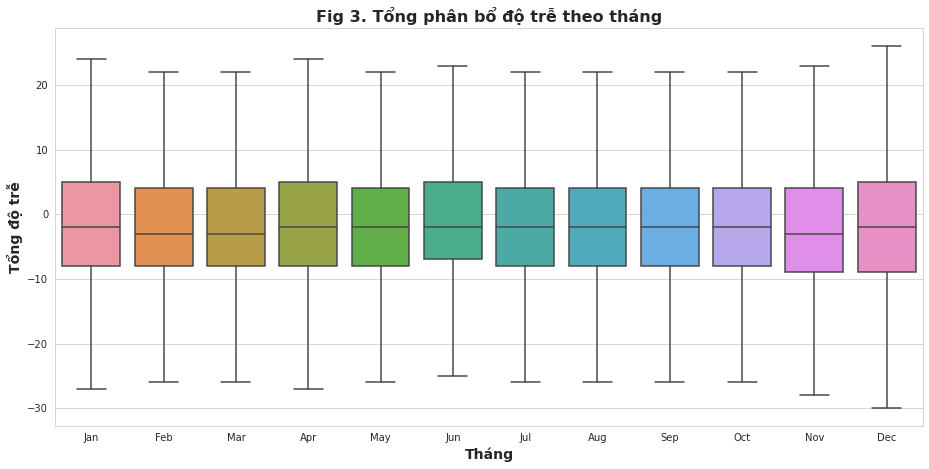

In [10]:
sns.set_style("whitegrid")
fig3, ax3 = plt.subplots(figsize=(12.8, 6.4), constrained_layout=True)
ax3 = sns.boxplot(x="Month", y="total_delay", order=np.sort(df["Month"].unique()), data=df[["total_delay", "Month"]], showfliers=False)
ax3.set_title("Fig 3. Tổng phân bổ độ trễ theo tháng", fontdict={"weight": "bold", "fontsize": 16})
ax3.set_xlabel("Tháng", fontdict={"weight": "bold", "fontsize": 14})
ax3.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
ax3.set_ylabel("Tổng độ trễ", fontdict={"weight": "bold", "fontsize": 14})
pass

Với việc phân bổ những lần trì hoãn được so sánh theo tháng. Dựa trên Hình 3, hầu hết các chuyến bay có tổng phân bổ độ trễ tương tự như nhau. Tháng 2, tháng 3 và tháng 11 có thời gian trễ trung bình là thấp nhất nhưng sự thay đổi trong tháng 11 lớn hơn tháng 2 và tháng 3. Do đó, kết luận rằng tháng 2 hoặc tháng 3 sẽ là sự lựa chọn chuyến bay tốt nhất vì có mức độ trễ tổng thể thấp hơn những tháng khác.

## Question 2: Máy bay cũ có ảnh hưởng đến việc chậm trễ của chuyến bay hay không ?

Năm sản xuẩt và số kí hiệu trên phần đuôi của máy bay trùng khớp với nhau. Do đó chúng ta sẽ sử dụng Scatter Plot(Biểu đồ phân tán) để xác định các xu hướng sẽ ảnh hưởng đến sự chậm trễ.

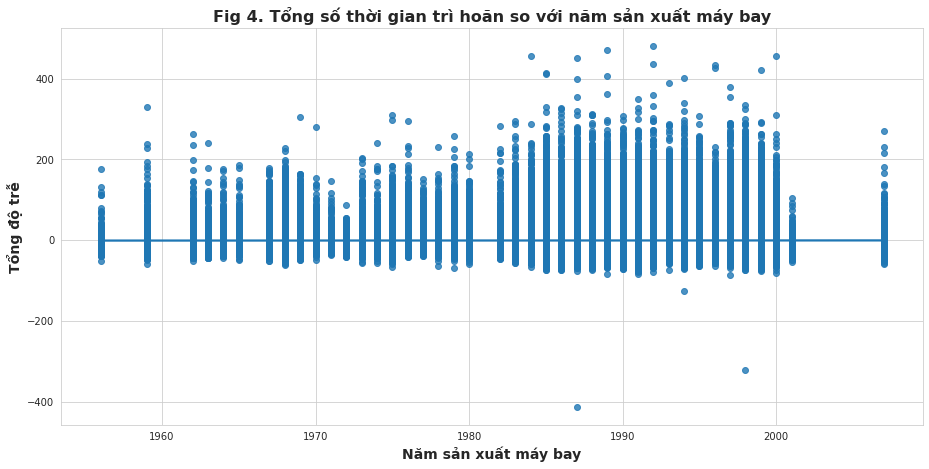

In [12]:
q2_df = pd.merge(df[["TailNum", "total_delay"]], plane_df[["tailnum", "year"]], left_on="TailNum", right_on="tailnum")

def int_year(x):
    try:
        return int(x)
    except:
        return None

q2_df["year"] = q2_df["year"].apply(int_year)

sns.set_style("whitegrid")
fig4, ax4 = plt.subplots(figsize=(12.8, 6.4), constrained_layout=True)
ax4 = sns.regplot(x="year", y="total_delay", data=q2_df, ci=None)
ax4.set_title("Fig 4. Tổng số thời gian trì hoãn so với năm sản xuất máy bay", fontdict={"weight": "bold", "fontsize": 16})
ax4.set_xlabel("Năm sản xuất máy bay", fontdict={"weight": "bold", "fontsize": 14})
ax4.set_ylabel("Tổng độ trễ", fontdict={"weight": "bold", "fontsize": 14})
pass


Dựa vào **Hình 4** ta có thể thấy không có mối quan hệ tuyến tính rõ ràng nào giữa thời gian trễ và năm sản xuất máy bay. Sự thay đổi của độ trễ lớn hơn nhiều đối với các máy bay có năm sản xuất mới hơn so với các máy bay cũ. Thời gian trễ trung bình cho mỗi năm được lập bảng để xác định xu hướng về thời gian trễ với năm sản xuất của máy bay.

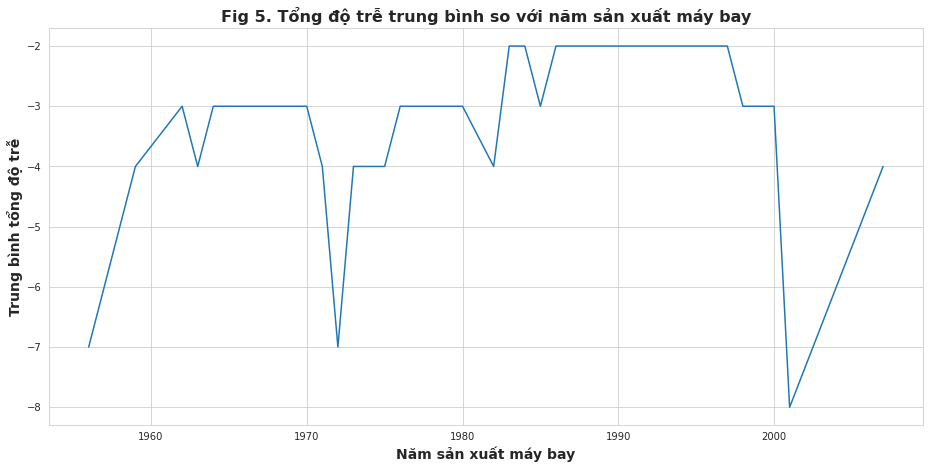

In [14]:
q2_grp = q2_df.groupby("year").median()

fig5, ax5 = plt.subplots(figsize=(12.8, 6.4), constrained_layout=True)
ax5 = sns.lineplot(x="year", y="total_delay", data=q2_grp)
ax5.set_title("Fig 5. Tổng độ trễ trung bình so với năm sản xuất máy bay", fontdict={"weight": "bold", "fontsize": 16})
ax5.set_xlabel("Năm sản xuất máy bay", fontdict={"weight": "bold", "fontsize": 14})
ax5.set_ylabel("Trung bình tổng độ trễ", fontdict={"weight": "bold", "fontsize": 14})
pass

Nhình vào **Hình 5** chúng ta thấy được: thời gian trễ không tăng đối với các máy bay cũ hơn, nhưng có sự gia tăng nhẹ về trung bình thời gian trễ đối với các máy bay mới hơn được sản xuất trong những năm 1990 so với những năm 1980 và 1970. Do đó, không thể kết luận rằng các máy bay cũ bị chậm trễ nhiều hơn.

## Question 3: Số lượng hành khách giữa các địa điểm bay thay đổi như thế nào theo thời gian

Tổng số chuyến bay đi từ địa điểm này đến địa điểm khác có thể được theo dõi bằng cách sử dụng thông tin chi tiết của các chuyến bay đi và đến. *Heat map* có thể được sử dụng để theo dõi các kiểu bay so với thời gian trong năm, nhưng có nhiều sân bay để hiển thị trên một axis. Vì vậy, vị trí của các sân bay được nhóm lại với nhau bằng cách sử dụng định vị địa lý của sân bay. Các sân bay được tính theo nhóm kinh độ và vĩ độ của chúng

In [17]:
df["month_year"] = df["Year"].astype(str) + "-" + df["Month"].astype(str).str.zfill(2)

origin_df = pd.merge(df[["month_year", "Origin"]], airport_df[["iata", "lat", "long"]], left_on="Origin", right_on="iata")

x = np.sort(origin_df["month_year"].unique())

def nearest_5(x):
    return np.round(x / 5) * 5

y_lat = np.arange(nearest_5(origin_df["lat"].min()), nearest_5(origin_df["lat"].max() + 5), 5)
y_long = np.arange(nearest_5(origin_df["long"].min()), nearest_5(origin_df["long"].max() + 5), 5)

lat_arr = np.zeros([len(y_lat), len(x)])
long_arr = np.zeros([len(y_long), len(x)])

origin_df["lat_grp"] = nearest_5(origin_df["lat"])
origin_df["long_grp"] = nearest_5(origin_df["long"])

lat_data = origin_df[["month_year", "lat_grp", "Origin"]].groupby(["lat_grp", "month_year"]).count().reset_index()
long_data = origin_df[["month_year", "long_grp", "Origin"]].groupby(["long_grp", "month_year"]).count().reset_index()

for _, row in lat_data.iterrows():
    arr_i, arr_j = None, None
    for i in range(len(y_lat)):
        if y_lat[i] == row["lat_grp"]:
            arr_i = i
            break
    for j in range(len(x)):
        if x[j] == row["month_year"]:
            arr_j = j
            break
    if arr_i != None and arr_j != None:
        lat_arr[arr_i, arr_j] = row["Origin"]


for _, row in long_data.iterrows():
    arr_i, arr_j = None, None
    for i in range(len(y_long)):
        if y_long[i] == row["long_grp"]:
            arr_i = i
            break
    for j in range(len(x)):
        if x[j] == row["month_year"]:
            arr_j = j
            break
    if arr_i != None and arr_j != None:
        long_arr[arr_i, arr_j] = row["Origin"]
        
lat_df = pd.DataFrame(lat_arr, columns=x, index=y_lat)
long_df = pd.DataFrame(long_arr, columns=x, index=y_long)



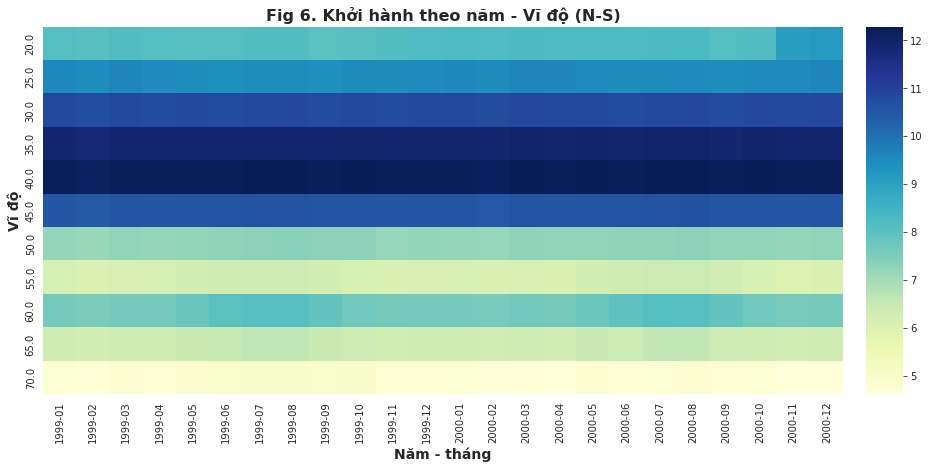

In [18]:
fig6, ax6 = plt.subplots(figsize=(12.8, 6.4), constrained_layout=True)
ax6 = sns.heatmap(data=np.log(lat_df), cmap="YlGnBu")
ax6.set_title("Fig 6. Khởi hành theo năm - Vĩ độ (N-S)", fontdict={"weight": "bold", "fontsize": 16})
ax6.set_xlabel("Năm - tháng", fontdict={"weight": "bold", "fontsize": 14})
ax6.set_ylabel("Vĩ độ", fontdict={"weight": "bold", "fontsize": 14})
pass

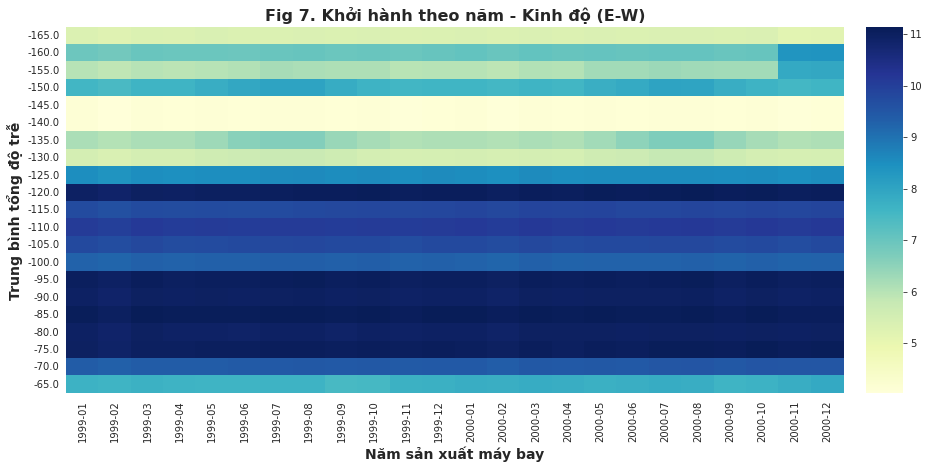

In [19]:
fig7, ax7 = plt.subplots(figsize=(12.8, 6.4), constrained_layout=True)
ax7 = sns.heatmap(data=np.log(long_df), cmap="YlGnBu")
ax7.set_title("Fig 7. Khởi hành theo năm - Kinh độ (E-W)", fontdict={"weight": "bold", "fontsize": 16})
ax7.set_xlabel("Năm sản xuất máy bay", fontdict={"weight": "bold", "fontsize": 14})
ax7.set_ylabel("Trung bình tổng độ trễ", fontdict={"weight": "bold", "fontsize": 14})
pass

In [20]:
df["month_year"] = df["Year"].astype(str) + "-" + df["Month"].astype(str).str.zfill(2)

origin_df = pd.merge(df[["month_year", "Dest"]], airport_df[["iata", "lat", "long"]], left_on="Dest", right_on="iata")

x = np.sort(origin_df["month_year"].unique())

def nearest_5(x):
    return np.round(x / 5) * 5

y_lat = np.arange(nearest_5(origin_df["lat"].min()), nearest_5(origin_df["lat"].max() + 5), 5)
y_long = np.arange(nearest_5(origin_df["long"].min()), nearest_5(origin_df["long"].max() + 5), 5)

lat_arr = np.zeros([len(y_lat), len(x)])
long_arr = np.zeros([len(y_long), len(x)])

origin_df["lat_grp"] = nearest_5(origin_df["lat"])
origin_df["long_grp"] = nearest_5(origin_df["long"])

lat_data = origin_df[["month_year", "lat_grp", "Dest"]].groupby(["lat_grp", "month_year"]).count().reset_index()
long_data = origin_df[["month_year", "long_grp", "Dest"]].groupby(["long_grp", "month_year"]).count().reset_index()

for _, row in lat_data.iterrows():
    arr_i, arr_j = None, None
    for i in range(len(y_lat)):
        if y_lat[i] == row["lat_grp"]:
            arr_i = i
            break
    for j in range(len(x)):
        if x[j] == row["month_year"]:
            arr_j = j
            break
    if arr_i != None and arr_j != None:
        lat_arr[arr_i, arr_j] = row["Dest"]


for _, row in long_data.iterrows():
    arr_i, arr_j = None, None
    for i in range(len(y_long)):
        if y_long[i] == row["long_grp"]:
            arr_i = i
            break
    for j in range(len(x)):
        if x[j] == row["month_year"]:
            arr_j = j
            break
    if arr_i != None and arr_j != None:
        long_arr[arr_i, arr_j] = row["Dest"]
        
lat_df = pd.DataFrame(lat_arr, columns=x, index=y_lat)
long_df = pd.DataFrame(long_arr, columns=x, index=y_long)

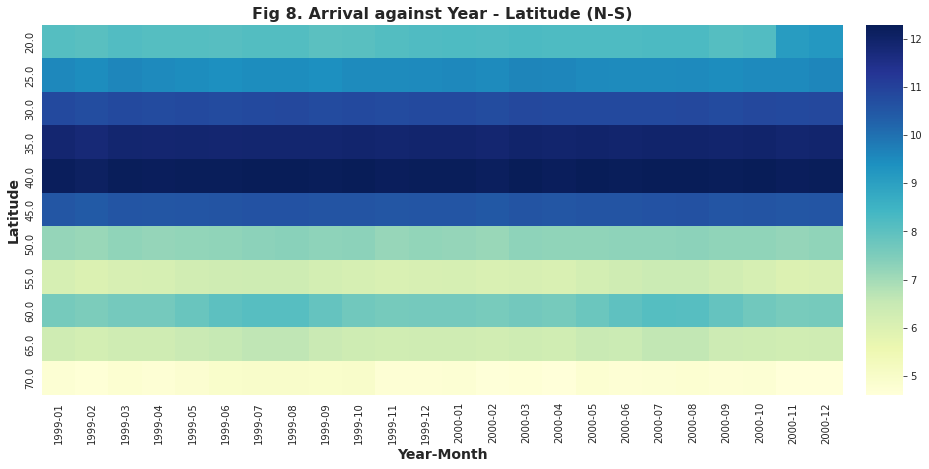

In [21]:
fig8, ax8 = plt.subplots(figsize=(12.8, 6.4), constrained_layout=True)
ax8 = sns.heatmap(data=np.log(lat_df), cmap="YlGnBu")
ax8.set_title("Fig 8. Đi đến theo năm - Vĩ độ (N-S)", fontdict={"weight": "bold", "fontsize": 16})
ax8.set_xlabel("Năm - tháng", fontdict={"weight": "bold", "fontsize": 14})
ax8.set_ylabel("Vĩ độ", fontdict={"weight": "bold", "fontsize": 14})
pass

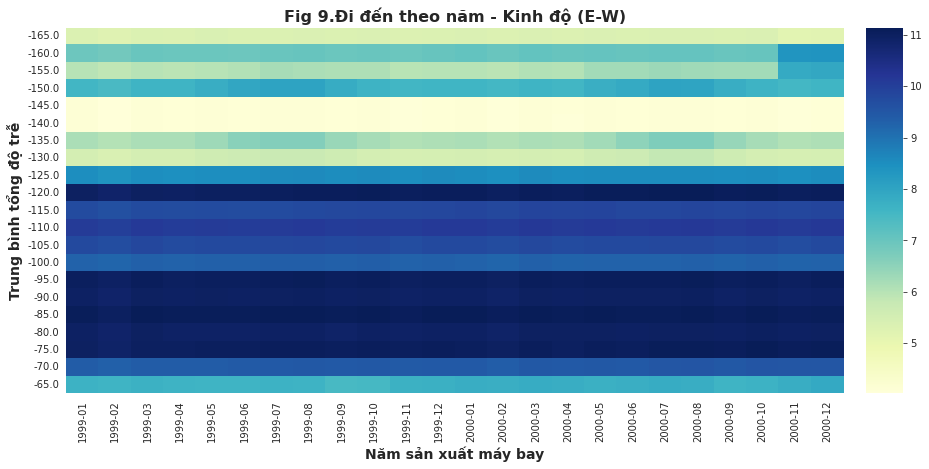

In [23]:
fig9, ax9 = plt.subplots(figsize=(12.8, 6.4), constrained_layout=True)
ax9 = sns.heatmap(data=np.log(long_df), cmap="YlGnBu")
ax9.set_title("Fig 9.Đi đến theo năm - Kinh độ (E-W)", fontdict={"weight": "bold", "fontsize": 16})
ax9.set_xlabel("Năm sản xuất máy bay", fontdict={"weight": "bold", "fontsize": 14})
ax9.set_ylabel("Trung bình tổng độ trễ", fontdict={"weight": "bold", "fontsize": 14})
pass

Nhình vào *Hình 6* và *Hình 9*, không có nhiều thay đổi về hình thức chuyến bay đến và đi theo địa điểm. Tuy nhiên có sự gia tăng tần suất chuyến bay vào giữa năm 1999 và 2000(màu hơi tối hơn một chút vào tháng 7 và tháng 8 trong Heat map). Hơn nữa có sự gia tăng tần suất chuyến bay trong những cuối năm 2000 tại khu vực Tây nam

## Question 4: Sự chậm trế của máy bay có phải do sự chồng xếp các chuyến bay bị muộn nối đuôi nhau hay không?

Độ trễ của mỗi máy bay được thiết lập theo một bảng thời gian. Nếu bất kỳ chuyến bay nào cũng bị trễ, sự chậm trễ đó sẽ chuyển sang chuyến bay kế tiếp và cứ tiếp tục như vậy. Do đó suy đoán ban đầu, sự chậm trễ của các chuyến bay sẽ tích lũy dần theo thời gian. Chúng ta sẽ chọn ra 200 máy bay ngẫu nhiên bay vào tháng 12 năm 2000 để thu thập thông tin về độ trễ và tạo bảng.

In [24]:
dec_df = df[(df["Month"] == 12) & (df["Year"] == 2000) & (df["TailNum"] != "UNKNOW") & (df["total_delay"] > 0)].copy()

dec_df["hr_day"] = dec_df["DayofMonth"].astype(str).str.zfill(2) + "-" + dec_df["hr"].astype(str).str.zfill(2)

# unique planes
dec_planes = np.sort(np.random.choice(dec_df["TailNum"].unique(), 200, replace=False))
dec_sample = dec_df[dec_df["TailNum"].isin(dec_planes)]

dec_delays = dec_sample[["TailNum", "hr_day", "total_delay"]].groupby(["TailNum", "hr_day"]).sum().reset_index()

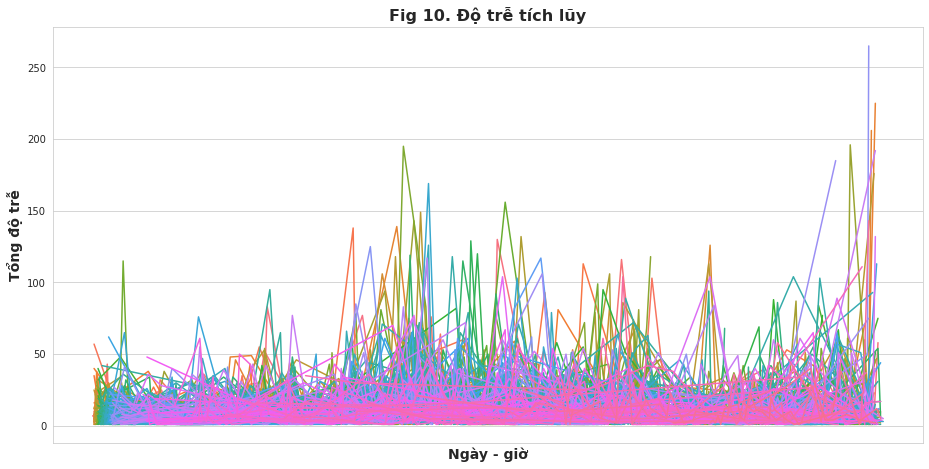

In [25]:
t = []
for i in range(1, 32):
    for j in range(0, 24):
        t.append(str(i).zfill(2) + "-" + str(j).zfill(2))

t_df = pd.DataFrame({"hr_day": t})
delay_df = pd.merge(t_df, dec_delays)

fig10, ax10 = plt.subplots(figsize=(12.8, 6.4), constrained_layout=True)
ax10 = sns.lineplot(x="hr_day", y="total_delay", hue="TailNum", legend=False, data=delay_df)
ax10.set_title("Fig 10. Độ trễ tích lũy", fontdict={"weight": "bold", "fontsize": 16})
ax10.set_xlabel("Ngày - giờ", fontdict={"weight": "bold", "fontsize": 14})
ax10.set_ylabel("Tổng độ trễ", fontdict={"weight": "bold", "fontsize": 14})
ax10.set_xticks([])
pass

Nhìn vào *Hình 10*, hầu hết sự chậm trễ tăng vượt bậc trong khoảng 1 giờ và không tích lũy theo thời gian. Theo như dự đoán ban đầu rằng nếu xảy ra sự chậm trễ liên tục của 1 chuyến bay thì sự chậm trễ sẽ xảy ra tương tự đối với chuyến bay tiếp theo. Tuy nhiên theo quan sát sự chậm trễ trong mẫu đã chọn không cho thấy bất kỳ đường nào tăng lên mà là tăng đột biến, đó là nơi xảy ra sự chậm trễ nhưng sau đó lịch trình các chuyến bay lại có xu hướng tiếp tục bình thường.

## Modelling

### Question 5: Có thể dự đoán được sự chậm trễ hay không?

Sử dụng các biến số có sẵn, chúng ta có thể xây dựng một mô hình dự đoán sự chậm trễ.
Chúng ta sẽ chọn lọc một số biến số quan trọng từ tệp chữ liệu chính để sử dụng làm tính năng dự đoán trước khi chuyến bay bắt đầu. Những tập dữ liệu khác cũng chứa các thông tin giúp dự đoán sự chậm trễ.
Thuật toán Random Forest sẽ được sử dụng để dự đoán liệu một chuyến bay có bị chậm trễ hay không
( Psudo: 
    If total_delay> 0:
        total_delay = 1
    Else:
        total_delay = 0
)
Những features(tính năng) quan trọng đó là:
Year, Month, DayOfWeek, CRSDepTime, CRSArrTime, CRSElapsedTime, Distance, origin_lat, origin_long, dest_lat, dest_long

Đầu tiên chúng ta sẽ trích xuất ra khoảng 10000 observations.
Chúng ta sẽ tách data làm hai phần thứ nhất là tập train và thứ hai là tập test với tỉ lệ 80:20
Tập train được chia tỷ lệ để cho phép mô hình huấn luyện tốt hơn và tập test cũng được chia tỷ lệ dựa trên sự biến đổi trong tập train. Những missing value(giá trị thiếu)đều sẽ được loại bỏ.

In [26]:
a = df.sample(10000, random_state=1)
b = pd.merge(a, airport_df, left_on="Origin", right_on="iata")
c = pd.merge(b, airport_df, left_on="Dest", right_on="iata")
c.rename(columns={"lat_x": "origin_lat", "long_x": "origin_long", "lat_y": "dest_lat", "long_y": "dest_long"}, inplace=True)

features = ["Year", "Month", "DayOfWeek", "CRSDepTime", "CRSArrTime", "CRSElapsedTime", "Distance", "origin_lat", "origin_long", "dest_lat", "dest_long"]
model_df = c[features]
model_df["total_delay"] = np.where(c["total_delay"] > 0, 1, 0)
model_df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Độ chính xác: 0.6261261261261262


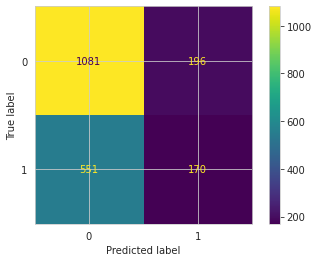

In [27]:
# chia train và test:
X_train, X_test, y_train, y_test = train_test_split(model_df[features], model_df["total_delay"], test_size=0.2, random_state=0)

# scalling:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Decision Tree(Cây quyết định):
clf = RandomForestClassifier(random_state=0)
model = clf.fit(X_train, y_train)

# Prediction:
predictions = model.predict(X_test)
plot_confusion_matrix(clf, X_test, y_test)
print("Độ chính xác:", accuracy_score(y_test, predictions))

Mô hình dựa trên Randomn Forest có độ chính xác là 63%